# Introduction to NumPy Pt 2

In [1]:
import numpy as np 

# Comparisons, Masks and Boolean Logic

In [2]:
import pandas as pd
from vega_datasets import data


In [55]:
rainfall_mm = np.array(
    data.seattle_weather().set_index('date')['precipitation']['2015'])
inches = rainfall_mm / 25.4
inches.shape

(365,)

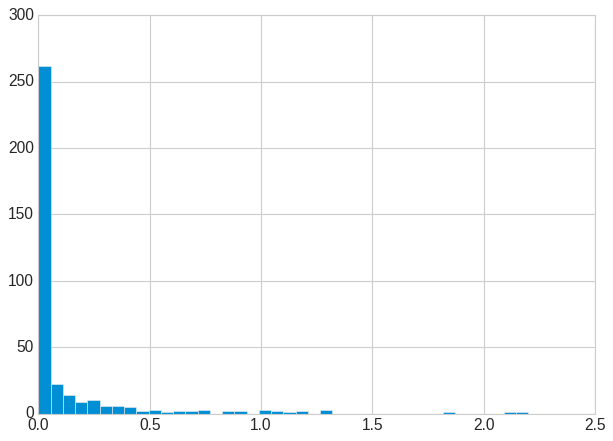

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(inches, 40);

# Comparison Operators as ufuncs

In [57]:
x = np.array([1,2,3,4,5])

In [58]:
x < 3

array([ True,  True, False, False, False])

In [59]:
x > 3

array([False, False, False,  True,  True])

In [60]:
x != 3

array([ True,  True, False,  True,  True])

>Array comparisons with compound expressions

In [61]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

>In 2 dimensions

In [62]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [63]:
x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

# Working with Boolean Arrays

In [64]:
print(x)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


>Counting entries

In [65]:
np.count_nonzero(x < 6)

8

In [66]:
np.sum(x < 6)

8

>Across rows and columns

In [67]:
np.sum(x < 6, axis=0)

array([1, 1, 3, 3])

In [68]:
np.sum(x < 6, axis=1)

array([3, 2, 3])

In [69]:
np.any(x > 8)

True

In [70]:
np.all(x > 0)

False

In [71]:
np.all(x >= 0)

True

In [72]:
np.any(x > 7, axis=1)

array([ True,  True, False])

## Boolean operators

In [73]:
np.sum((inches > 0.5 ) & (inches < 1))

13

In [75]:
np.sum((rainfall_mm > 10) & (rainfall_mm < 20))

16

In [78]:
np.sum(~( (inches <= 0.5 ) | (inches >= 1 )))

13

In [80]:
print("Number of days without rain:\t", np.sum(inches == 0))
print("Number of days with rain:\t", np.sum(inches != 0))
print("Number of days > 0.5 inches:\t", np.sum(inches > 0.5))
print("Rainy days > 0.2 inches:\t", np.sum((inches > 0) & (inches < 0.2)))

Number of days without rain:	 221
Number of days with rain:	 144
Number of days > 0.5 inches:	 27
Rainy days > 0.2 inches:	 83


# Boolean arrays as masks

In [81]:
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [82]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [83]:
x[x < 5]

array([4, 0, 3, 3, 1, 3, 4, 0])

In [84]:
rainy = (inches > 0)
summer = (np.arange(365) - 172 <90) & (np.arange(365) - 172 > 0)

In [91]:
print("Median precip on rainy days", np.median(inches[rainy]))
print("Median precip on summer days", np.median(inches[summer]))
print("Maximum precip on summer days", np.max(inches[summer]))
print("Median precip on non-summer rainy days", np.median(inches[rainy & ~summer]))

Median precip on rainy days 0.14960629921259844
Median precip on summer days 0.0
Maximum precip on summer days 1.2795275590551183
Median precip on non-summer rainy days 0.16141732283464566


In [89]:
(np.arange(10) - 2) > 5

array([False, False, False, False, False, False, False, False,  True,
        True])

# Fancy Indexing

In [93]:
import numpy as np 
rng = np.random.default_rng(seed=172)
x = rng.integers(100, size=10)
print(x)

[33 17 74 92  6 58  7 30 22 47]


In [94]:
[x[3], x[7], x[2]]

[92, 30, 74]

In [95]:
x[[3,7,4]]

array([92, 30,  6])

In [96]:
ind = [3,7,4]
x[ind]

array([92, 30,  6])

>The array has the shape of the index

In [97]:
ind = np.array([[3,7],
                [4,5]])
x[ind]

array([[92, 30],
       [ 6, 58]])

>Multiple dimensions

In [99]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [100]:
row = np.array([0,1,2])
col = np.array([2,1,3])

In [101]:
X[row]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [103]:
X[row,col]

array([ 2,  5, 11])

In [104]:
X[row[:, np.newaxis]]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [105]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [106]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# Combined indexing

In [107]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

>Combine fancy and simple

In [109]:
X[2, [2,0,3]]

array([10,  8, 11])

>Combine fancy with slicing

In [110]:
X[1:,[2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

>Combine fancy with masking

In [111]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Selecting random points

In [112]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

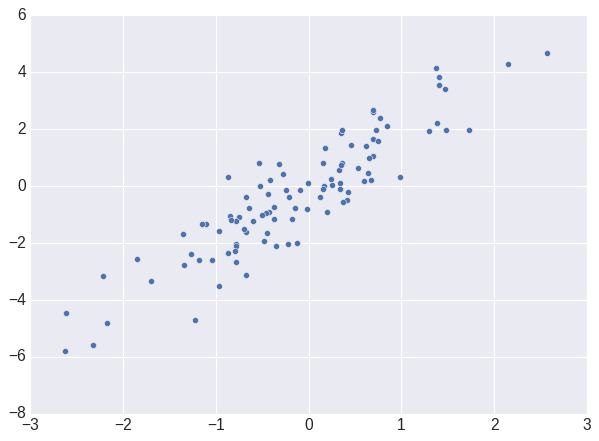

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(X[:,0], X[:,1], s=30);

> select 20 random points

In [122]:
indices = rng.choice(X.shape[0], 20, replace=False)
indices

array([33, 39, 46, 16, 85,  2, 40, 37, 50, 95, 49, 56, 43, 81, 87, 30, 64,
       90, 12, 69])

In [123]:
X[:5]

array([[ 0.77221702,  2.38768489],
       [-0.96271152, -1.5854034 ],
       [ 0.32280088,  0.56388269],
       [-0.32083704,  0.77040957],
       [-0.78039237, -2.02900027]])

In [124]:
X.shape

(100, 2)

In [125]:
selection = X[indices]
selection.shape

(20, 2)

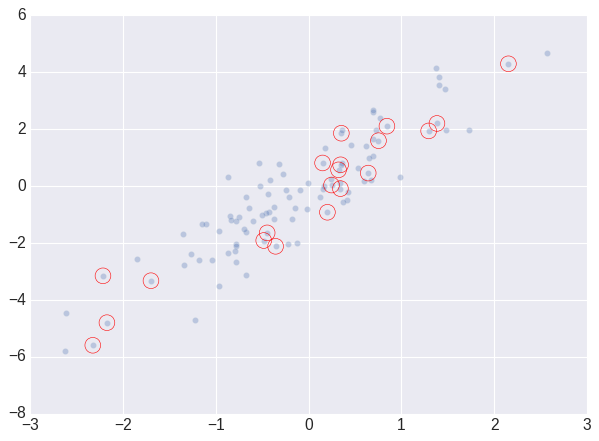

In [136]:
plt.scatter(X[:,0], X[:,1], s=30, alpha=0.3)
plt.scatter(selection[:,0], selection[:,1], edgecolors='red', 
            facecolor='none', s=200);

# Modifying values with fancy indexing

In [139]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [140]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [142]:
x = np.zeros(10)
x[[0,0]] = [4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [144]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
x[i] += 1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

>`at` method

In [145]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

# Binning Data

In [157]:
rng = np.random.default_rng(seed=42)
x = rng.normal(size=100)

Manually compute histogram

In [158]:
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

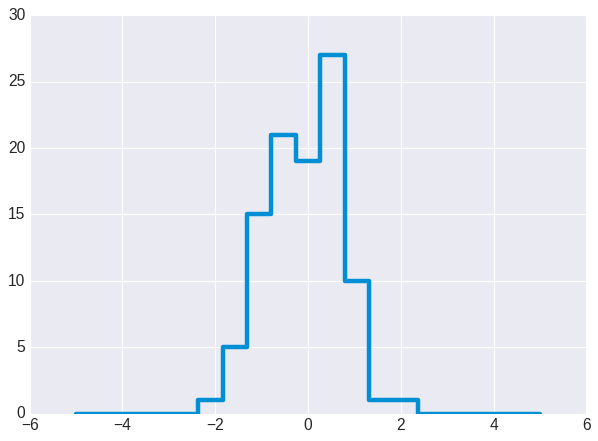

In [159]:
plt.plot(bins, counts, drawstyle='steps');

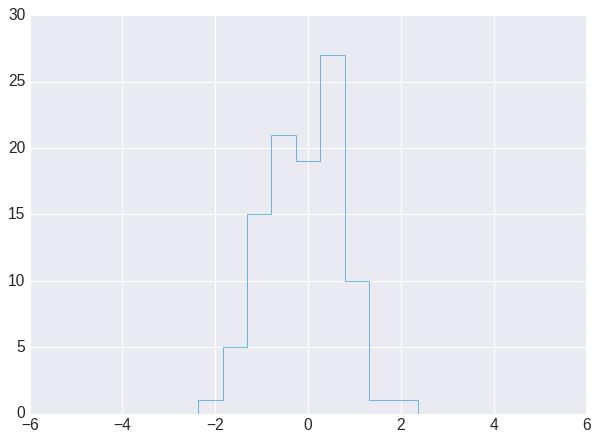

In [168]:
plt.hist(x, bins, histtype='step');

# Sorting Arrays

> Selection sort
>
> $O(N^2)$

In [179]:
import numpy as np 

def selection_sort(x):
    for i in range(len(x)): 
        swap = i + np.argmin(x[i:])
        print(f"{i=}, {swap=}")
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [180]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

i=0, swap=1
i=1, swap=1
i=2, swap=3
i=3, swap=3
i=4, swap=4


array([1, 2, 3, 4, 5])

>Bogosort
>
>Very inefficient based on random shuffling until the result happens to be sorted
>
>$O(N \times N!)$

In [181]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        rng.shuffle(x)
    return x

In [182]:
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

>Fast sorting
>
>Default is $O(N \log N)$ quicksort
>
>Can choose heapsort or mergesort

In [187]:
x = np.array([2,1,4,3,5])
print(np.sort(x))
print(x)

[1 2 3 4 5]
[2 1 4 3 5]


In [188]:
x.sort()

In [189]:
print(x)

[1 2 3 4 5]


>argsort returns indices of sorted elements

In [190]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)
print(x[i])

[1 0 3 2 4]
[1 2 3 4 5]


>Sorting along rows and colums

In [191]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4,6))
X

array([[0, 7, 6, 4, 4, 8],
       [0, 6, 2, 0, 5, 9],
       [7, 7, 7, 7, 5, 1],
       [8, 4, 5, 3, 1, 9]])

In [193]:
np.sort(X)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [195]:
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

>Partial sorts: partitioning
>
>eg. $K$ smallest values rather than sorting the entire array
>takes the smallest K values and puts them at the beginning.
>
>Both sub-groups have arbitrary order

In [199]:
x = np.array([7, 2, 9, 1, 6, 5, 4])
np.partition(x, 2)

array([1, 2, 4, 7, 6, 5, 9])

In [200]:
X

array([[0, 7, 6, 4, 4, 8],
       [0, 6, 2, 0, 5, 9],
       [7, 7, 7, 7, 5, 1],
       [8, 4, 5, 3, 1, 9]])

In [202]:
np.partition(X, 2, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [203]:
np.partition(X, 2, axis=1)

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

# NumPy k-Nearest Neighbors

In [225]:
rng = np.random.default_rng(seed=1072)
X = rng.random((10,2))

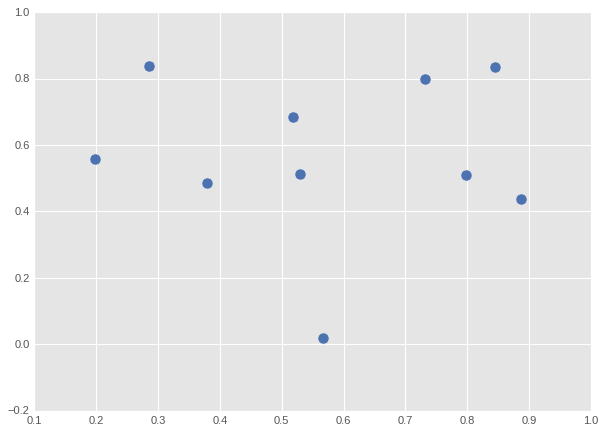

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.scatter(X[:,0], X[:,1], s=100);

>Compute the distance between the points

In [227]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)

In [228]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [229]:
X

array([[0.51875285, 0.68375989],
       [0.88710275, 0.43698164],
       [0.52925632, 0.51273057],
       [0.19807892, 0.55679665],
       [0.79818734, 0.50937835],
       [0.73140744, 0.79933684],
       [0.8446842 , 0.83604152],
       [0.37903383, 0.48513945],
       [0.28584196, 0.83724795],
       [0.56756174, 0.01828761]])

In [230]:
X[:, np.newaxis]

array([[[0.51875285, 0.68375989]],

       [[0.88710275, 0.43698164]],

       [[0.52925632, 0.51273057]],

       [[0.19807892, 0.55679665]],

       [[0.79818734, 0.50937835]],

       [[0.73140744, 0.79933684]],

       [[0.8446842 , 0.83604152]],

       [[0.37903383, 0.48513945]],

       [[0.28584196, 0.83724795]],

       [[0.56756174, 0.01828761]]])

In [231]:
X.shape, X[:, np.newaxis].shape

((10, 2), (10, 1, 2))

In [232]:
X[:10, np.newaxis]

array([[[0.51875285, 0.68375989]],

       [[0.88710275, 0.43698164]],

       [[0.52925632, 0.51273057]],

       [[0.19807892, 0.55679665]],

       [[0.79818734, 0.50937835]],

       [[0.73140744, 0.79933684]],

       [[0.8446842 , 0.83604152]],

       [[0.37903383, 0.48513945]],

       [[0.28584196, 0.83724795]],

       [[0.56756174, 0.01828761]]])

In [233]:
X[np.newaxis, :10]

array([[[0.51875285, 0.68375989],
        [0.88710275, 0.43698164],
        [0.52925632, 0.51273057],
        [0.19807892, 0.55679665],
        [0.79818734, 0.50937835],
        [0.73140744, 0.79933684],
        [0.8446842 , 0.83604152],
        [0.37903383, 0.48513945],
        [0.28584196, 0.83724795],
        [0.56756174, 0.01828761]]])

In [234]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

>Sort along each row, the left-most columns will give the indices of the nearest neighbors

In [235]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 2, 5, 7, 8, 4, 3, 6, 1, 9],
       [1, 4, 2, 5, 6, 0, 7, 9, 3, 8],
       [2, 7, 0, 4, 3, 5, 1, 8, 6, 9],
       [3, 7, 8, 2, 0, 5, 4, 9, 1, 6],
       [4, 1, 2, 5, 0, 6, 7, 9, 3, 8],
       [5, 6, 0, 4, 2, 1, 8, 7, 3, 9],
       [6, 5, 4, 0, 1, 2, 8, 7, 3, 9],
       [7, 2, 3, 0, 8, 4, 5, 9, 1, 6],
       [8, 0, 3, 7, 2, 5, 6, 4, 1, 9],
       [9, 2, 7, 1, 4, 3, 0, 5, 6, 8]])

>Choose only 2 nearest neighbors
>
>Remember, one will be the self

In [236]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
nearest_partition

array([[0, 2, 5, 7, 8, 4, 6, 1, 3, 9],
       [4, 1, 2, 5, 6, 0, 3, 7, 8, 9],
       [7, 0, 2, 4, 1, 5, 6, 3, 8, 9],
       [3, 7, 8, 2, 0, 5, 4, 6, 1, 9],
       [4, 1, 2, 5, 0, 3, 6, 7, 8, 9],
       [5, 0, 6, 4, 1, 3, 2, 7, 8, 9],
       [5, 4, 6, 0, 1, 3, 2, 7, 8, 9],
       [7, 2, 3, 0, 8, 4, 6, 5, 1, 9],
       [0, 3, 8, 7, 2, 5, 6, 4, 1, 9],
       [2, 9, 7, 1, 4, 5, 6, 3, 8, 0]])

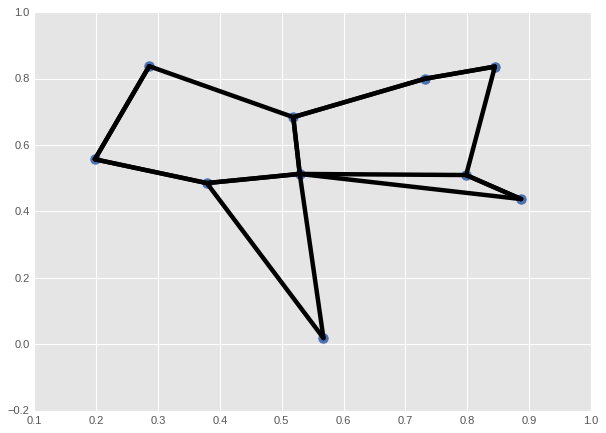

In [237]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color="black")

# Structured NumPy Arrays

In [238]:
name = ["Alice", "Igor", "Lewella", "Baldrick"]
age = [25, 45, 32, 10]
weight = [55.0, 45.5, 68.5, 35.2]

In [239]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [240]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Igor', 45, 45.5) ('Lewella', 32, 68.5)
 ('Baldrick', 10, 35.2)]


In [241]:
data['name']

array(['Alice', 'Igor', 'Lewella', 'Baldrick'], dtype='<U10')

In [242]:
data[0]

('Alice', 25, 55.)

In [243]:
data[-1]['name']

'Baldrick'

In [244]:
data[data['age'] < 30]['name']

array(['Alice', 'Baldrick'], dtype='<U10')

>Structured Arrays

In [245]:
np.dtype({'names':('name', 'age', 'weight'),
                  'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [246]:
np.dtype({'names':('name', 'age', 'weight'),
                  'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [247]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [248]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

>RecordArrays

In [249]:
data_rec = data.view(np.recarray)
data_rec

rec.array([('Alice', 25, 55. ), ('Igor', 45, 45.5), ('Lewella', 32, 68.5),
           ('Baldrick', 10, 35.2)],
          dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [250]:
data_rec.age

array([25, 45, 32, 10], dtype=int32)

In [251]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

69.5 ns ± 1.57 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
1.17 μs ± 8.05 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.58 μs ± 59.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
